In [1]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns

In [3]:
checkpoints = r'C:\Users\USAMA\plantvillage dataset\basedir\E1-cp-{epoch:04d}-loss{val_loss:.2f}.h5'

In [5]:
train_dir = r'C:\Users\USAMA\plantvillage dataset\basedir\train'
validation_dir = r'C:\Users\USAMA\plantvillage dataset\basedir\validation'
test_dir = r'C:\Users\USAMA\plantvillage dataset\basedir\test'

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='sigmoid'))

D:\anconda\envs\MLLab\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,088,452 (49.93 MB)

 Trainable params: 13,088,452 (49.93 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

In [15]:
train_datagen = ImageDataGenerator(
                                    rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                                                    train_dir,
                                                    target_size=(256, 256),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
                                                        validation_dir,
                                                        target_size=(256, 256),
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 1600 images belonging to 4 classes.
Found 252 images belonging to 4 classes.


In [17]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(256, 256), batch_size=32,class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(256, 256),batch_size=32,class_mode='categorical')

Found 1600 images belonging to 4 classes.
Found 252 images belonging to 4 classes.


In [19]:
EpochCheckpoint = ModelCheckpoint(checkpoints,
                             monitor="val_loss",
                             save_best_only=True, 
                             verbose=1)
callbacks = [EpochCheckpoint]

In [21]:
model_history = model.fit(train_generator,
                         validation_data =validation_generator,
                         steps_per_epoch=train_generator.n//train_generator.batch_size,
                         validation_steps = validation_generator.n//validation_generator.batch_size,
                         epochs = 30,
                         callbacks = callbacks)

D:\anconda\envs\MLLab\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - acc: 0.4037 - loss: 1.2536
Epoch 1: val_loss improved from inf to 0.53955, saving model to C:\Users\USAMA\plantvillage dataset\basedir\E1-cp-0001-loss0.54.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 144s 3s/step - acc: 0.4065 - loss: 1.2495 - val_acc: 0.8125 - val_loss: 0.5395
Epoch 2/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - acc: 0.7823 - loss: 0.5577
Epoch 2: val_loss did not improve from 0.53955
50/50 ━━━━━━━━━━━━━━━━━━━━ 122s 2s/step - acc: 0.7821 - loss: 0.5572 - val_acc: 0.6652 - val_loss: 0.7933
Epoch 3/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - acc: 0.8167 - loss: 0.4177
Epoch 3: val_loss improved from 0.53955 to 0.37898, saving model to C:\Users\USAMA\plantvillage dataset\basedir\E1-cp-0003-loss0.38.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - acc: 0.8168 - loss: 0.4173 - val_acc: 0.7946 - val_loss: 0.3790
Epoch 4/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - acc: 0.8450 - loss: 0.3460
Epoch 4: val_loss improved from 0.37898 to 0.31193, saving model to C:\Users\USAMA\plantvillage dataset\basedir\E1-cp-0004-loss0.31.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - acc: 0.8450 - loss: 0.3457 - val_acc: 0.8571 - val_loss: 0.3119
Epoch 5/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - acc: 0.8740 - loss: 0.3047
Epoch 5: val_loss improved from 0.31193 to 0.29774, saving model to C:\Users\USAMA\plantvillage dataset\basedir\E1-cp-0005-loss0.30.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - acc: 0.8739 - loss: 0.3046 - val_acc: 0.8661 - val_loss: 0.2977
Epoch 6/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - acc: 0.8887 - loss: 0.2724
Epoch 6: val_loss improved from 0.29774 to 0.27004, saving model to C:\Users\USAMA\plantvillage dataset\basedir\E1-cp-0006-loss0.27.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 121s 2s/step - acc: 0.8885 - loss: 0.2724 - val_acc: 0.8750 - val_loss: 0.2700
Epoch 7/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - acc: 0.9126 - loss: 0.2224
Epoch 7: val_loss did not improve from 0.27004
50/50 ━━━━━━━━━━━━━━━━━━━━ 120s 2s/step - acc: 0.9124 - loss: 0.2225 - val_acc: 0.8705 - val_loss: 0.3050
Epoch 8/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - acc: 0.9185 - loss: 0.1954
Epoch 8: val_loss improved from 0.27004 to 0.24171, saving model to C:\Users\USAMA\plantvillage dataset\basedir\E1-cp-0008-loss0.24.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - acc: 0.9184 - loss: 0.1956 - val_acc: 0.8795 - val_loss: 0.2417
Epoch 9/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - acc: 0.9296 - loss: 0.1872
Epoch 9: val_loss did not improve from 0.24171
50/50 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - acc: 0.9294 - loss: 0.1873 - val_acc: 0.8348 - val_loss: 0.4373
Epoch 10/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - acc: 0.9371 - loss: 0.1623
Epoch 10: val_loss improved from 0.24171 to 0.20892, saving model to C:\Users\USAMA\plantvillage dataset\basedir\E1-cp-0010-loss0.21.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - acc: 0.9370 - loss: 0.1625 - val_acc: 0.8929 - val_loss: 0.2089
Epoch 11/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - acc: 0.9352 - loss: 0.1583
Epoch 11: val_loss improved from 0.20892 to 0.17926, saving model to C:\Users\USAMA\plantvillage dataset\basedir\E1-cp-0011-loss0.18.h5


50/50 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - acc: 0.9352 - loss: 0.1582 - val_acc: 0.9107 - val_loss: 0.1793
Epoch 12/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - acc: 0.9348 - loss: 0.1545
Epoch 12: val_loss did not improve from 0.17926
50/50 ━━━━━━━━━━━━━━━━━━━━ 116s 2s/step - acc: 0.9349 - loss: 0.1544 - val_acc: 0.8170 - val_loss: 0.5462
Epoch 13/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - acc: 0.9231 - loss: 0.1868
Epoch 13: val_loss did not improve from 0.17926
50/50 ━━━━━━━━━━━━━━━━━━━━ 113s 2s/step - acc: 0.9235 - loss: 0.1860 - val_acc: 0.8661 - val_loss: 0.2693
Epoch 14/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - acc: 0.9582 - loss: 0.1220
Epoch 14: val_loss did not improve from 0.17926
50/50 ━━━━━━━━━━━━━━━━━━━━ 113s 2s/step - acc: 0.9581 - loss: 0.1222 - val_acc: 0.9018 - val_loss: 0.2645
Epoch 15/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - acc: 0.9521 - loss: 0.1214
Epoch 15: val_loss did not improve from 0.17926
50/50 ━━━━━━━━━━━━━━━━━━━━ 125s 3s/step - acc: 0.9521 - loss: 0.1213

In [23]:
model_history.history

{'acc': [0.5450000166893005,
  0.7743750214576721,
  0.8212500214576721,
  0.8450000286102295,
  0.8712499737739563,
  0.8812500238418579,
  0.9024999737739563,
  0.9131249785423279,
  0.921875,
  0.9325000047683716,
  0.9362499713897705,
  0.9393749833106995,
  0.9437500238418579,
  0.9518749713897705,
  0.953125,
  0.9606249928474426,
  0.9624999761581421,
  0.9674999713897705,
  0.9631249904632568,
  0.96875,
  0.96875,
  0.9831249713897705,
  0.9781249761581421,
  0.9793750047683716,
  0.9825000166893005,
  0.9862499833106995,
  0.9818750023841858,
  0.9837499856948853,
  0.9925000071525574,
  0.9887499809265137],
 'loss': [1.0433872938156128,
  0.5290604829788208,
  0.3983815312385559,
  0.33325642347335815,
  0.29674017429351807,
  0.27147775888442993,
  0.22692911326885223,
  0.20367172360420227,
  0.19393609464168549,
  0.17134368419647217,
  0.1568315625190735,
  0.1493455320596695,
  0.14935697615146637,
  0.13535137474536896,
  0.11612765491008759,
  0.11010316014289856,
  0

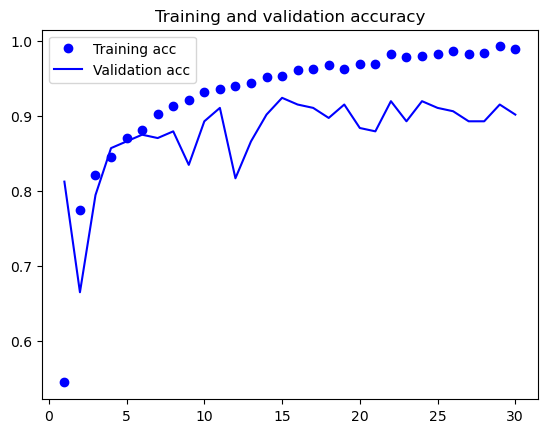

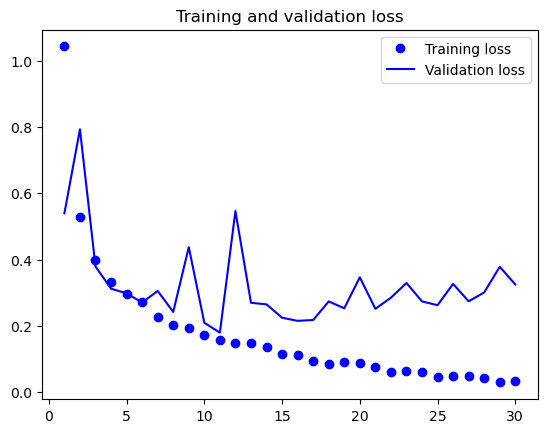

<Figure size 640x480 with 0 Axes>

In [29]:
acc = model_history.history['acc']
val_acc = model_history.history['val_acc']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt.savefig(r'C:\Users\USAMA\plantvillage dataset\basedir\model save')

Found 200 images belonging to 4 classes.
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 628ms/step


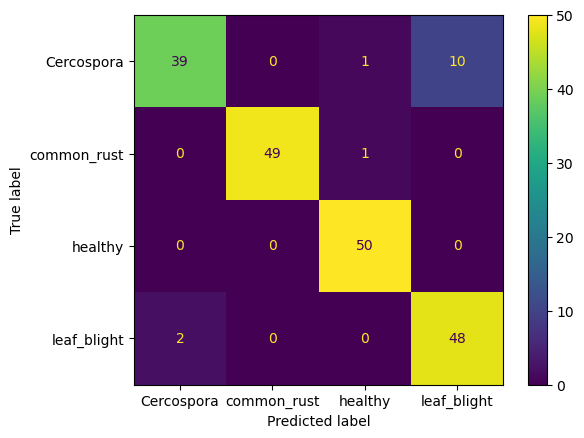

In [35]:
#model = load_model(r'C:\Users\USAMA\plantvillage dataset\basedir\model save')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(256, 256), batch_size=32, shuffle=False, class_mode='categorical')
label=test_generator.labels
preds=model.predict(test_generator)
pred = np.argmax(preds, axis = 1)
cm = confusion_matrix(label, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=['Cercospora', 'common_rust','healthy', 'leaf_blight'])
disp.plot()
plt.show()
#plt.savefig(r'C:\Users\Administrator\Downloads\ML Lab\Computer vision\lab11\confusion_matrics.jpg')

In [37]:
print(classification_report(label, pred, target_names=['Cercospora', 'common_rust','healthy', 'leaf_blight']))

              precision    recall  f1-score   support

  Cercospora       0.95      0.78      0.86        50
 common_rust       1.00      0.98      0.99        50
     healthy       0.96      1.00      0.98        50
 leaf_blight       0.83      0.96      0.89        50

    accuracy                           0.93       200
   macro avg       0.94      0.93      0.93       200
weighted avg       0.94      0.93      0.93       200

